In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('seoul_covid19.CSV.csv',encoding='cp949')

In [3]:
df['날짜'] = df['날짜'].str[:-1]

In [4]:
df['날짜'] = '2020.0'+df['날짜']

In [5]:
df['DATE'] = df['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y.%m.%d'))

In [6]:
df['CONT'] = 1

In [7]:
lome = pd.read_csv('local_people_melt.csv')
lome['GU'] = lome['G_DNG_NM'].str[2:6]

In [8]:
lome['STD_DD'] = lome['STD_DD'].apply(lambda x: pd.to_datetime(str(x), format='%Y.%m.%d'))

In [9]:
lome['YEAR'] = lome['STD_DD'].dt.year

In [11]:
lome

,STD_DD,시간대구분,행정동코드,G_DNG_NM,HUMAN_NM,FLOW,SEX_CD,HDONG_NM,WEEK_NUM,AGE_CD,WEEKDAY,GU,YEAR
0,2019-02-01,0,11350625,서울 노원구 중계2.3동,남자_0009세생활인구수,1858.3096,M,중계2.3동,5,0009세,4,노원구,2019
1,2019-02-01,1,11350625,서울 노원구 중계2.3동,남자_0009세생활인구수,1785.0549,M,중계2.3동,5,0009세,4,노원구,2019
2,2019-02-01,2,11350625,서울 노원구 중계2.3동,남자_0009세생활인구수,1733.5305,M,중계2.3동,5,0009세,4,노원구,2019
3,2019-02-01,3,11350625,서울 노원구 중계2.3동,남자_0009세생활인구수,1745.2137,M,중계2.3동,5,0009세,4,노원구,2019
4,2019-02-01,4,11350625,서울 노원구 중계2.3동,남자_0009세생활인구수,1712.3663,M,중계2.3동,5,0009세,4,노원구,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506363,2020-05-31,19,11140605,서울 중구 을지로동,여자_70세이상생활인구수,301.2843,F,을지로동,22,70세이상,6,중구,2020
5506364,2020-05-31,20,11140605,서울 중구 을지로동,여자_70세이상생활인구수,301.9059,F,을지로동,22,70세이상,6,중구,2020
5506365,2020-05-31,21,11140605,서울 중구 을지로동,여자_70세이상생활인구수,246.0693,F,을지로동,22,70세이상,6,중구,2020
5506366,2020-05-31,22,11140605,서울 중구 을지로동,여자_70세이상생활인구수,251.1501,F,을지로동,22,70세이상,6,중구,2020


In [28]:
gu_we = lome.query('YEAR == 2020').query('(시간대구분 > 7) and (시간대구분 < 23)').groupby(['GU','STD_DD','시간대구분'])['FLOW'].sum().reset_index()

In [54]:
gu_we = gu_we.groupby(['GU','STD_DD'])['FLOW'].mean().reset_index()

In [29]:
GU_WE = pd.pivot_table(data=gu_we,index=['GU','STD_DD'],columns='시간대구분',values='FLOW')

In [15]:
infec = df.groupby(['거주지','DATE'])['CONT'].sum().reset_index()
infec = infec[infec['DATE']<'2020-06-01']
infec['WEEK_NUM'] = infec['DATE'].dt.weekofyear

In [18]:
infec1 = infec.groupby(['거주지','DATE'])['CONT'].sum().reset_index()

In [30]:
gu_we

,GU,STD_DD,시간대구분,FLOW
0,노원구,2020-02-01,8,1044.437474
1,노원구,2020-02-01,9,1036.801875
2,노원구,2020-02-01,10,1024.772126
3,노원구,2020-02-01,11,1011.465924
4,노원구,2020-02-01,12,1003.092841
...,...,...,...,...
3625,중구,2020-05-31,18,463.107672
3626,중구,2020-05-31,19,452.135034
3627,중구,2020-05-31,20,437.780578
3628,중구,2020-05-31,21,422.927655


In [31]:
GU_WE = pd.pivot_table(data=gu_we,index=['GU','STD_DD'],columns='시간대구분',values='FLOW').reset_index()

In [21]:
infec1

,거주지,DATE,CONT
0,노원구,2020-02-25,2
1,노원구,2020-02-26,1
2,노원구,2020-02-27,1
3,노원구,2020-02-28,3
4,노원구,2020-02-29,1
5,노원구,2020-03-08,1
6,노원구,2020-03-09,1
7,노원구,2020-03-10,2
8,노원구,2020-03-12,1
9,노원구,2020-03-13,1


In [32]:
GU_WE
#life1.columns = ['GU','STD_DD',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

시간대구분,GU,STD_DD,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,노원구,2020-02-01,1044.437474,1036.801875,1024.772126,1011.465924,1003.092841,995.353289,994.080678,998.474517,1004.774315,1015.780784,1026.463801,1034.219880,1044.761782,1055.424974,1061.491469
1,노원구,2020-02-02,1059.122828,1051.703717,1037.292019,1028.166209,1025.059248,1026.761446,1027.812123,1033.922781,1039.739364,1044.672216,1057.310113,1065.072511,1072.440621,1076.724240,1080.572806
2,노원구,2020-02-03,987.247009,958.468896,944.498860,933.370394,925.605199,920.181783,914.391970,918.414736,923.279114,940.238871,975.161960,1015.296183,1035.414877,1054.437596,1063.550783
3,노원구,2020-02-04,975.149470,946.533691,933.381709,921.280681,914.461261,914.428595,914.302422,914.938161,924.896262,936.183819,967.228018,1008.488420,1030.068206,1050.095081,1059.922791
4,노원구,2020-02-05,975.031222,947.015763,934.070951,924.693327,916.700900,916.510761,913.928884,917.615474,922.464813,939.576602,973.417136,1012.318587,1033.286673,1052.302243,1061.392880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,중구,2020-05-27,781.822839,911.083682,967.640354,1007.738859,1034.537471,1042.310614,1039.372062,1017.613131,974.992947,898.535648,747.383527,644.665052,584.208322,527.561283,479.655168
238,중구,2020-05-28,782.608095,908.624089,965.696082,1005.742365,1027.026988,1037.143496,1032.349720,1011.655064,974.610684,901.689811,755.126846,653.542889,587.411986,529.763115,481.854453
239,중구,2020-05-29,777.760647,899.902326,958.441238,992.622440,1010.628481,1018.493211,1012.397252,990.807916,949.196911,877.723084,739.010587,639.133475,580.936800,529.513653,488.929004
240,중구,2020-05-30,459.562969,494.964734,533.746661,572.516836,601.691438,614.931852,620.058369,602.433341,586.275275,559.032888,529.579694,500.121949,462.706602,429.530162,405.063705


In [35]:
noone = GU_WE.query('GU == " 노원구"').drop(columns='GU').set_index('STD_DD')
mid = GU_WE.query('GU == " 중구 "').drop(columns='GU').set_index('STD_DD')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
gu_we

,GU,STD_DD,시간대구분,FLOW
0,노원구,2020-02-01,8,1044.437474
1,노원구,2020-02-01,9,1036.801875
2,노원구,2020-02-01,10,1024.772126
3,노원구,2020-02-01,11,1011.465924
4,노원구,2020-02-01,12,1003.092841
...,...,...,...,...
3625,중구,2020-05-31,18,463.107672
3626,중구,2020-05-31,19,452.135034
3627,중구,2020-05-31,20,437.780578
3628,중구,2020-05-31,21,422.927655


In [58]:
nowon = gu_we.query('GU == " 노원구"').set_index('STD_DD')
nowon = nowon.drop(columns='GU')
jung = gu_we.query('GU == " 중구 "').set_index('STD_DD')
jung = jung.drop(columns='GU')

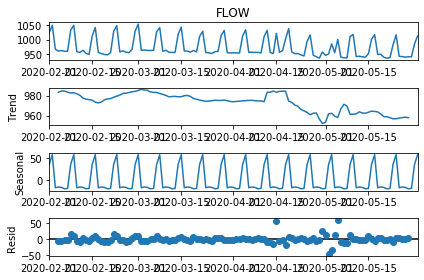

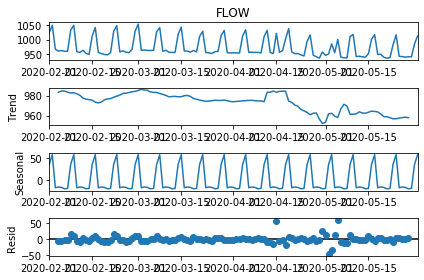

In [60]:
result = seasonal_decompose(x=nowon['FLOW'], period=7, model='additive')
result.plot()
#sns.lineplot(data=gu_we.query('GU == " 노원구"').reset_index(drop=True), x='STD_DD',y='FLOW')

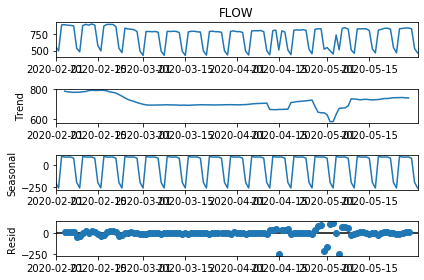

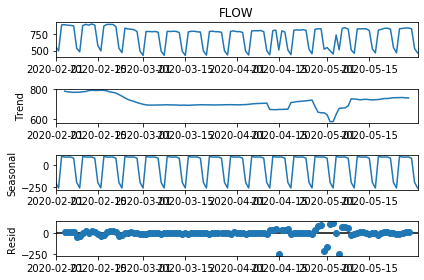

In [61]:
result = seasonal_decompose(x=jung['FLOW'], period=7, model='additive')
result.plot()